## Part B: Newton Method Implementation

In [80]:
import numpy as np
import pandas as pd 
import seaborn as sn
import matplotlib.pyplot as plt
import random
import os

In [81]:
def func(x1, x2):
    # Define the function
    ####### TODO ########
    res = 2*x1**2 + 2*x2**2 - 17*x2*np.cos(0.2*np.pi*x1) - x1*x2
    #####################
    return res

In [82]:
def hessian(x1, x2):
    # Calculate the hessian matrix
    # Use theoretically-derived formulas to implement this function
    ####### TODO ########
    hessian = np.zeros((2,2))
    hessian[0, 0] = 4 + 17*x2*(0.2*np.pi)**2*np.cos(0.2*np.pi*x1)
    hessian[0, 1] = 17*0.2*np.pi*np.sin(0.2*np.pi*x1) - 1
    hessian[1, 0] = 17*0.2*np.pi*np.sin(0.2*np.pi*x1) -1
    hessian[1, 1] = 4
    res = hessian
    #####################
    return res



In [83]:
# Define function inputs
def hessianInv(x1, x2):
    # Calculate the determinant and inverse of the hessian matrix
    ####### TODO ########
    mat = hessian(x1, x2)
    inv = np.linalg.inv(mat)
    #####################
    return inv

In [84]:
def gradient(x1, x2):
    # Calculate the gradient vector
    # Use theoretically-derived formulas to implement this function
    ####### TODO ########
    gradient = np.zeros((2,))
    gradient[0] = 4*x1 + 17*x2*0.2*np.pi*np.sin(0.2*np.pi*x1) - x2
    gradient[1] = 4*x2 - 17*np.cos(0.2*np.pi*x1) - x1
    res = gradient
    #####################
    return res

In [85]:
def newtonMethod(x1, x2, epochs):

    for i in range(epochs):
        
        # Perform one step of the newton method
        # Use previous functions to implement this part
        # Update values of x1 and x2
        ####### TODO ########
        heseianInv_times_gradeint = hessianInv(x1, x2) @ gradient(x1, x2)
        x1 = x1 - heseianInv_times_gradeint[0]
        x2 = x2 - heseianInv_times_gradeint[1]

        #####################
    return x1, x2


Now we shall go on to finding the minimum value

In [86]:
x1 = 1
x2 = 3
epochs = 100
x1, x2 = newtonMethod(x1, x2, epochs)
minVal = func(x1, x2)
print(f"x1 is: {x1} and x2 is: {x2} (after {epochs} epochs)")
print(f"The Minimum Value for the function is: {minVal} (after {epochs} epochs)")

x1 is: 0.13087466007249957 and x2 is: 4.268357652256218 (after 100 epochs)
The Minimum Value for the function is: -36.40349774185023 (after 100 epochs)


* desired output is (approximately):
* x1 is: 0.13 and x2 is: 4.27 (after 100 epochs)
* The Minimum Value for the function is: -36.40 (after 100 epochs)

Now we go on to plot the wanted shape

In [87]:
####### TODO #########
stepSize = 0.5
range_x1 = np.arange(-5, 5, stepSize)
range_x2 = np.arange(0, 10, stepSize)


In [88]:
points = []
# We want to classify the points into three categories:
# Close = -1, Far = 0, Further = 1
categories = []
for x1 in range_x1:
    for x2 in range_x2:
        # Use Newton method and find the distance as stated in the question
        ######## TODO ##########
        x1_new , x2_new = newtonMethod(x1, x2, epochs)
        distance = abs(-36.5 - func(x1_new, x2_new))
        ########################
        if distance < 15:
            categories.append(-1)
        elif distance < 150:
            categories.append(0)
        else:
            categories.append(1)
        points.append([x1, x2])

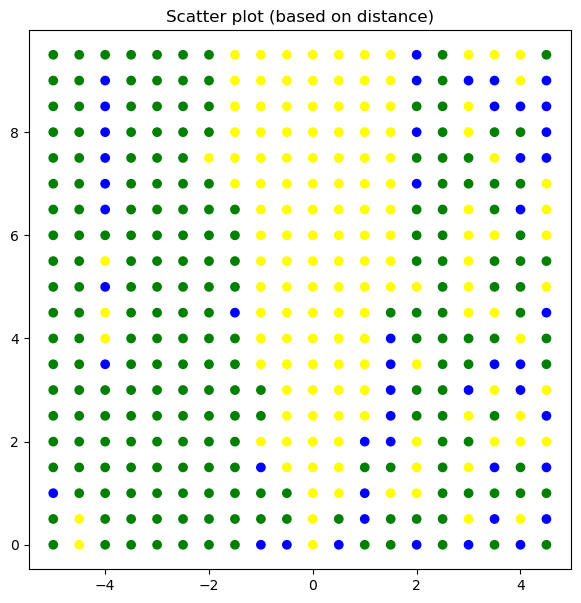

In [90]:
plt.figure(figsize=(7,7))
plt.title('Scatter plot (based on distance)')
########## TODO ###########
# Complete the figure using plt.scatter`
color_map = {-1: 'yellow', 0: 'green', 1: 'blue'}
colors = [color_map[cat] for cat in categories]
plt.scatter([p[0] for p in points], [p[1] for p in points], c=colors)
###########################
plt.show()

## Conclution:

more close to point (0, 10) more close to minimom 